BOSTON HOUSING DATA WITH XGBOOS REGRESSION

Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics 
from pandas.plotting import scatter_matrix

IMPORTING BOSTON HOUSE DATASET

In [3]:
# Load Boston Housing dataset from Online CSV
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
house_price_dataset = pd.read_csv(url)
house_price_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
house_price_dataset.rename(columns={"medv" : "price"}, inplace=True)
house_price_dataset.columns = house_price_dataset.columns.str.upper()
house_price_dataset.shape
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


CHECK FOR MISSING VALUES

In [5]:
house_price_dataset.isnull().sum()
#house_price_dataset.hist(bins=50 , figsize=(16,10))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

UNDERSTANDING CORR BETWEEN DATA

<Axes: >

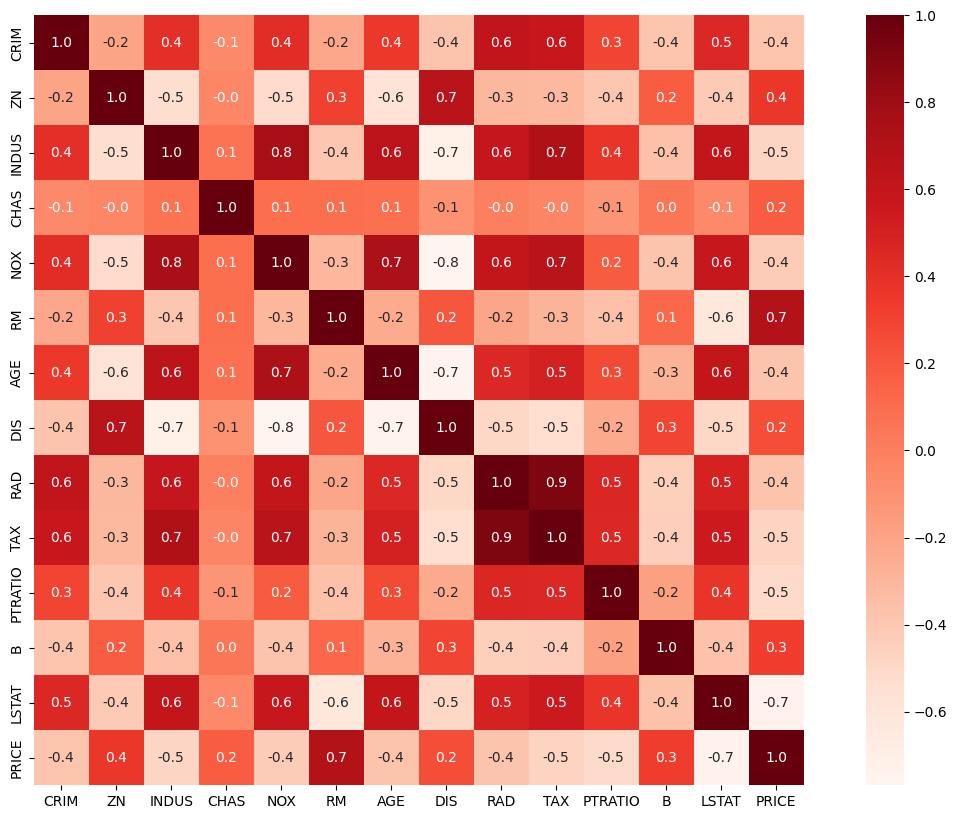

In [6]:
corr_matrix = house_price_dataset.corr()
#Making a corelation heat map to predict the corealtion
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix , cbar=True , square=True , fmt=".1f" , annot=True , annot_kws={'size' : 10} , cmap="Reds")

SPLIT THE FEATURES AND LABELS ---- TRAIN TEST

In [7]:
x = house_price_dataset.drop(columns=["PRICE"])
y = house_price_dataset["PRICE"]

x_train,x_test,y_train,y_test = train_test_split(x , y , test_size= 0.2 , random_state=2)

TRAIN THE MODEL

In [8]:
model = XGBRegressor()
model.fit(x_train , y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


EVALUATION OF MODEL

In [9]:
# Evaluating based on the training data
training_data_predicted = model.predict(x_train)
# accu_score_trainig = accuracy_score(y_train , training_data_predicted) we cant use accuracy here as it is not categorical data
# r squre error , mean absolute error  

#R Squared Error &&&&&&&&& MEA Error 
r_square_train = metrics.r2_score(training_data_predicted , y_train)
mea_train = metrics.mean_absolute_error(training_data_predicted , y_train)
print(f"R Square error :- {r_square_train}\nMean Absoulte Error :- {mea_train}")


# Evaluating based on the testing data
testing_data_predicted = model.predict(x_test)
r_square_test = metrics.r2_score(testing_data_predicted , y_test)
mea_test = metrics.mean_absolute_error(testing_data_predicted , y_test)
print(f"R Square error :- {r_square_test}\nMean Absoulte Error :- {mea_test}")

R Square error :- 0.9999980033283392
Mean Absoulte Error :- 0.0091330346494618
R Square error :- 0.8981202952337628
Mean Absoulte Error :- 2.0748727686264927


VISULIZING THE ACTUAL PRICE AND PREDICTED PRICES

Text(0, 0.5, 'Predicted Prices')

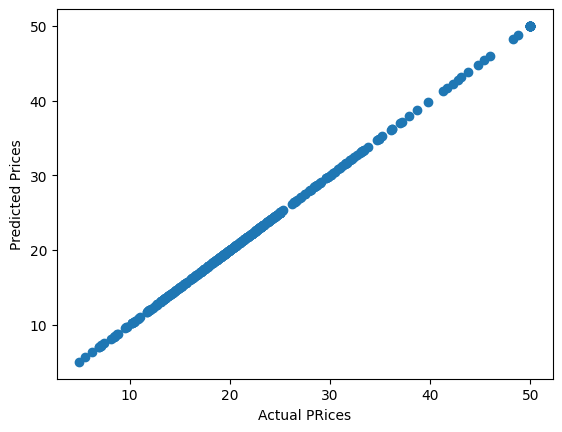

In [10]:
plt.scatter(y_train , training_data_predicted)
plt.xlabel("Actual PRices")
plt.ylabel("Predicted Prices")

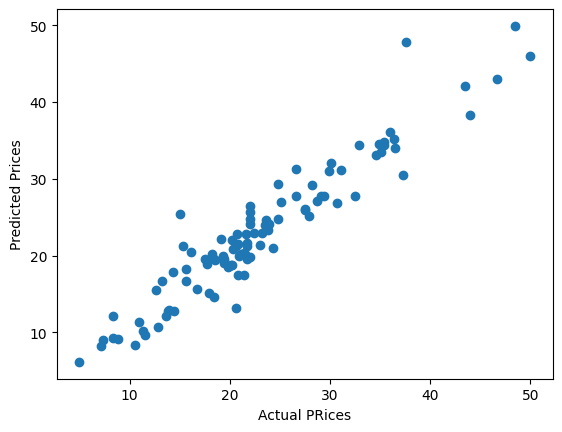

In [11]:
plt.scatter(y_test , testing_data_predicted)
plt.xlabel("Actual PRices")
plt.ylabel("Predicted Prices")
plt.show()